In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

## Generate Data

Perceptron is a _binary classfier_ which indicates that our data input should be linearly separated in order to work. 
The input of the Perceptron can be a vector of numbers, but for the shake of this demo and easy representations we can restrain to the 2D space. So all we need to do is to create two linearly separated blobs. 

The data can be splitted in 2 parts, a _traning_ and a _testing_ part. Lets use 70% of our data for training and the remaining 30% for testing.

data example:
[[ 0.59738843  0.48975724  1.        ]
 [ 0.41058309  0.32939635  1.        ]
 [-0.5341934  -0.51718081  0.        ]]


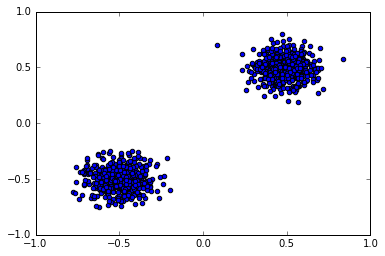

In [4]:
def get_datapoints(n, blob_centers=[[0., 0.], [1., 1.]]):
    import numpy as np
    from sklearn.datasets.samples_generator import make_blobs
    X, labels = make_blobs(n_samples=n, centers=blob_centers, cluster_std=0.1)
    return np.append(X, labels.reshape(len(labels), 1), axis=1) # add X and labels

# Generate some data
N_DATAPOINTS = 1000
BLOB_CENTERS = [[-0.5, -0.5], [0.5, 0.5]]
data = get_datapoints(N_DATAPOINTS, blob_centers=BLOB_CENTERS)
data_train = data[:int(N_DATAPOINTS * 0.7)]
data_test = data[int(N_DATAPOINTS * 0.7):]

# print and plot some data to see how they look like
print "data example:\n", data[:3]
_ = plt.scatter(data[:,0], data[:,1])

# The perceptron Class

In [48]:
import numpy as np
class Perceptron:
    
    def __init__(self, w, verbose=True):
        """ perceptron initialization """
        # initialize weights
        # self.w = rand(2) * 2 - 1
        self.w = np.array(w)


        # The learning rate we choose
        self.learning_rate = 0.01


        # print training info if verbose 
        self.verbose = verbose
    
    def response(self,x):
        """ perceptron output, dot product between w and x """
        y = x[0] * self.w[0] + x[1] * self.w[1] 
        return 1 if y >= 0. else 0

    
    def train(self, data, n_epochs=100):
        """ 
        trains all the vector in data.
        Every vector in data must have three elements,
        the third element (x[2]) must be the label (desired output)
        """
        
        # for demo purposes, we keep also the evolution of the weights
        self.w_vec = [] 
        self.w_vec.append(self.w.copy())

        learned = False
        for epoch in range(n_epochs):
            
            sum_error = 0.0
            for datapoint in data: 

                expected = datapoint[2]
                predicted = self.response(datapoint)    

                if expected != predicted: 

                    # update sum error
                    sum_error += abs(expected - predicted)

                    # update weights
                    # w(t+1) = w(t) + learning_rate * (expected - predicted) * x
                    self.w[0] += self.learning_rate * (expected - predicted) * datapoint[0]
                    self.w[1] += self.learning_rate * (expected - predicted) * datapoint[1]

            # keep epoch evolution history
            self.w_vec.append(self.w.copy())

            print "epoch:{0}, sum error: {1}, learned: {2}, weights: {3}"\
                    .format(epoch, sum_error, (sum_error == 0), self.w)
                
            # terminate condition
            if sum_error == 0.:
                break



# Train Perceptron
For demo reasons, we want to make an educated guess of the initial weights so that they are as 'bad' as possible for the classification problem at hand. In this case, the best choice would be to get the centers of the blobs of our datapoints. In this way the Perceptron starts at the most challenging point which ensures that we will endup in a proper classification after several iterations (epochs).

In [51]:
perceptron = Perceptron(w=[-0.5, 0.5])
perceptron.train(data_train)  

epoch:0, sum error: 36.0, learned: False, weights: [-0.28613631  0.62517577]
epoch:1, sum error: 5.0, learned: False, weights: [-0.25535266  0.63742329]
epoch:2, sum error: 1.0, learned: False, weights: [-0.24968282  0.63929468]
epoch:3, sum error: 1.0, learned: False, weights: [-0.24401298  0.64116607]
epoch:4, sum error: 1.0, learned: False, weights: [-0.23834314  0.64303746]
epoch:5, sum error: 1.0, learned: False, weights: [-0.23267329  0.64490886]
epoch:6, sum error: 1.0, learned: False, weights: [-0.22700345  0.64678025]
epoch:7, sum error: 1.0, learned: False, weights: [-0.22133361  0.64865164]
epoch:8, sum error: 1.0, learned: False, weights: [-0.21566377  0.65052303]
epoch:9, sum error: 1.0, learned: False, weights: [-0.20999393  0.65239442]
epoch:10, sum error: 0.0, learned: True, weights: [-0.20999393  0.65239442]


# Classify using (trained) Perceptron

Now we are ready to apply our trained Perceptron in a test dataset. 


### Accuracy
As in any classification problem we are interested to know how well our perceptron performs. A typical measure of the classification performance is the _prediction accuracy_, the number of datapoints correctly classified (true positives plus true negatives).


In [52]:
n_datapoints_test = len(data_test)
n_correct = 0
for x in data_test:
    r = perceptron.response(x)
    if r == x[2]: 
        n_correct +=1
print "N total datapoints in the test: ", n_datapoints_test
print "N errors: ", n_correct
print "Prediction Accuracy: ", 100.* n_correct / n_datapoints_test, '%'

N total datapoints in the test:  300
N errors:  300
Prediction Accuracy:  100.0 %


### Classification Vizualisation
The problem was constructed so that we are able to easily visualize the classification and its performance in a 2D plane. The visualization will allow us in a single view to understand the work undertaken by our perceptron. 

* **datapoints**. The two blobs of data are visible as well as their corresponding class color. 

* **separation planes**. On the same plot we have the separation plane of the perceptron (solid line) together with the separation line due to the initial weights (dashed line). The separation line as a result of the perceptron might still misslabels few datapoints but performs typically better than our initial naive guess.  


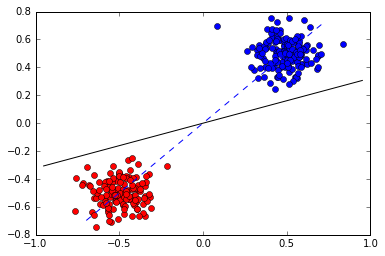

In [53]:
from pylab import  plot, show, norm

# plot the datapoints
for x in data_test:
    r = perceptron.response(x)
    if r == 1:
        plot(x[0], x[1], 'ob')  
    else:
        plot(x[0], x[1], 'or')


# plot of the separation planes (lines) - The separation line is orthogonal to w.

# plot now the initial separation line
ww_i = perceptron.w_vec[0]/norm(perceptron.w_vec[0])
ww1_i = [ww_i[1], -ww_i[0]]
ww2_i = [-ww_i[1], ww_i[0]]
plot([ww1_i[0], ww2_i[0]],[ww1_i[1], ww2_i[1]],'--b')


ww = perceptron.w/norm(perceptron.w)
ww1 = [ww[1], -ww[0]]
ww2 = [-ww[1], ww[0]]
plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'-k')


show()

### Visualizing training evolution

The training phase of the perceptron was done in a way that the weights get updated and the prediction values are compared with the labels of the training set. The training stops with the condition that all our datapoints are properly classified (or we reached the total number of epochs we put as limit). Nevertheless in each epoch iteration we expect that the error sum is smaller and the separation plane is separating better the two classes. 

If we could only vizualise the evolution...

Lets give it a try!

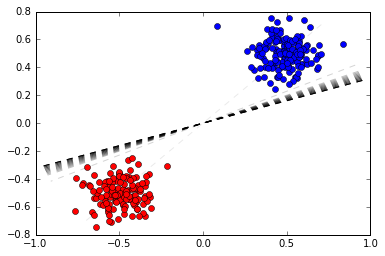

In [54]:
from pylab import  plot, show, norm

# plot the datapoints
for x in data_test:
    r = perceptron.response(x)
    if r == 1:
        plot(x[0], x[1], 'ob')  
    else:
        plot(x[0], x[1], 'or')


# plot the separation lines with alpha reflecting the evolution 
n_epochs = len(perceptron.w_vec)
epoch = 0
for w in perceptron.w_vec:
    epoch += 1
    a = 0.1* epoch * 10. / n_epochs
    ww = w/norm(w)
    ww1 = [ww[1], -ww[0]]
    ww2 = [-ww[1], ww[0]]
    plot([ww1[0], ww2[0]],[ww1[1], ww2[1]],'--k', alpha=a)

show()

Thats it! The alpha of the separation planes reflect the evolution of the training. The first line appears almost transparent and clearly is a very bad separation. Nevertheless, already in the first epoch, our Perceptron manages to adjust the weights and brings the separation plane in a much better position. In a third epoch already the sum of errors verges to zero and any further improvements are marginal. Finally, the last iteration produces a very nice separation line between our two classes. The evolution of the separation plane gives us a good grasp of how the Perceptron training evolved. 